## 회귀분석
- 회귀분석은 실제값과 예측값의 차이를 기반으로 한 지표들을 중심으로 성능평가가 지표가 발전

### MAE
- 실제값과 예측값의 차이를 절댓값으로 변환하여 평균한 것
- 에러의 크기가 그대로 반영
- 이상치에 영향을 받는다.

### MSE
- 실제값과 예측값의 차이를 제곱하여 평균한 것
- 실제값과 예측값 차이의 면적의 합을 의미
- 특이값이 존재하면 수치가 증가

### RMSE
- 실제값과 예측값의 차이를 제곱한 평균의 루트
- 에러를 제곱하면 에러가 클수록 그에 따른 가중치가 높이 반영
- 손실이 기하급수적으로 증가하는 상황에서 실제 오류 평균보다 값이 더 커지는 것을 상쇄하기 위해 사용

### MSLE
- 실제값과 예측값의 차이를 제곱해 평균한 것에 로그를 적용한 것
- RMSE와 같이 손실이 기하급수적으로 증가하는 상황에서 실제 오류의 평균보다 값이 커지는 것을 상쇄하기 위해 사용

### MAPE
- MAE를 퍼센트로 표시
- 오차가 예측값에서 차지하는 정도를 나타냄

### 회귀분석 순서
1. 데이터를 로드하고 확인
2. 데이터를 분할
3. 데이터를 전처리
4. 모델 학습
5. 성능 평가 및 예측값 저장

In [61]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [62]:
# data = fetch_california_housing()

In [63]:
# data.keys()

In [64]:
# df = pd.DataFrame(data['data'], columns=data['feature_names'])
# df.head()

In [65]:
# data.target

In [66]:
# df는 독립변수
# target 종속변수

In [67]:
# df['Value'] = df['target']

In [68]:
# 데이터로드 안되서 불러옴
df = pd.read_csv("califonia.csv")

In [69]:
# 데이터프레임을 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Value       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [70]:
# 결측치 확인
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Value         0
dtype: int64

In [71]:
# 산점도와 선형회귀 직선 시각화
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

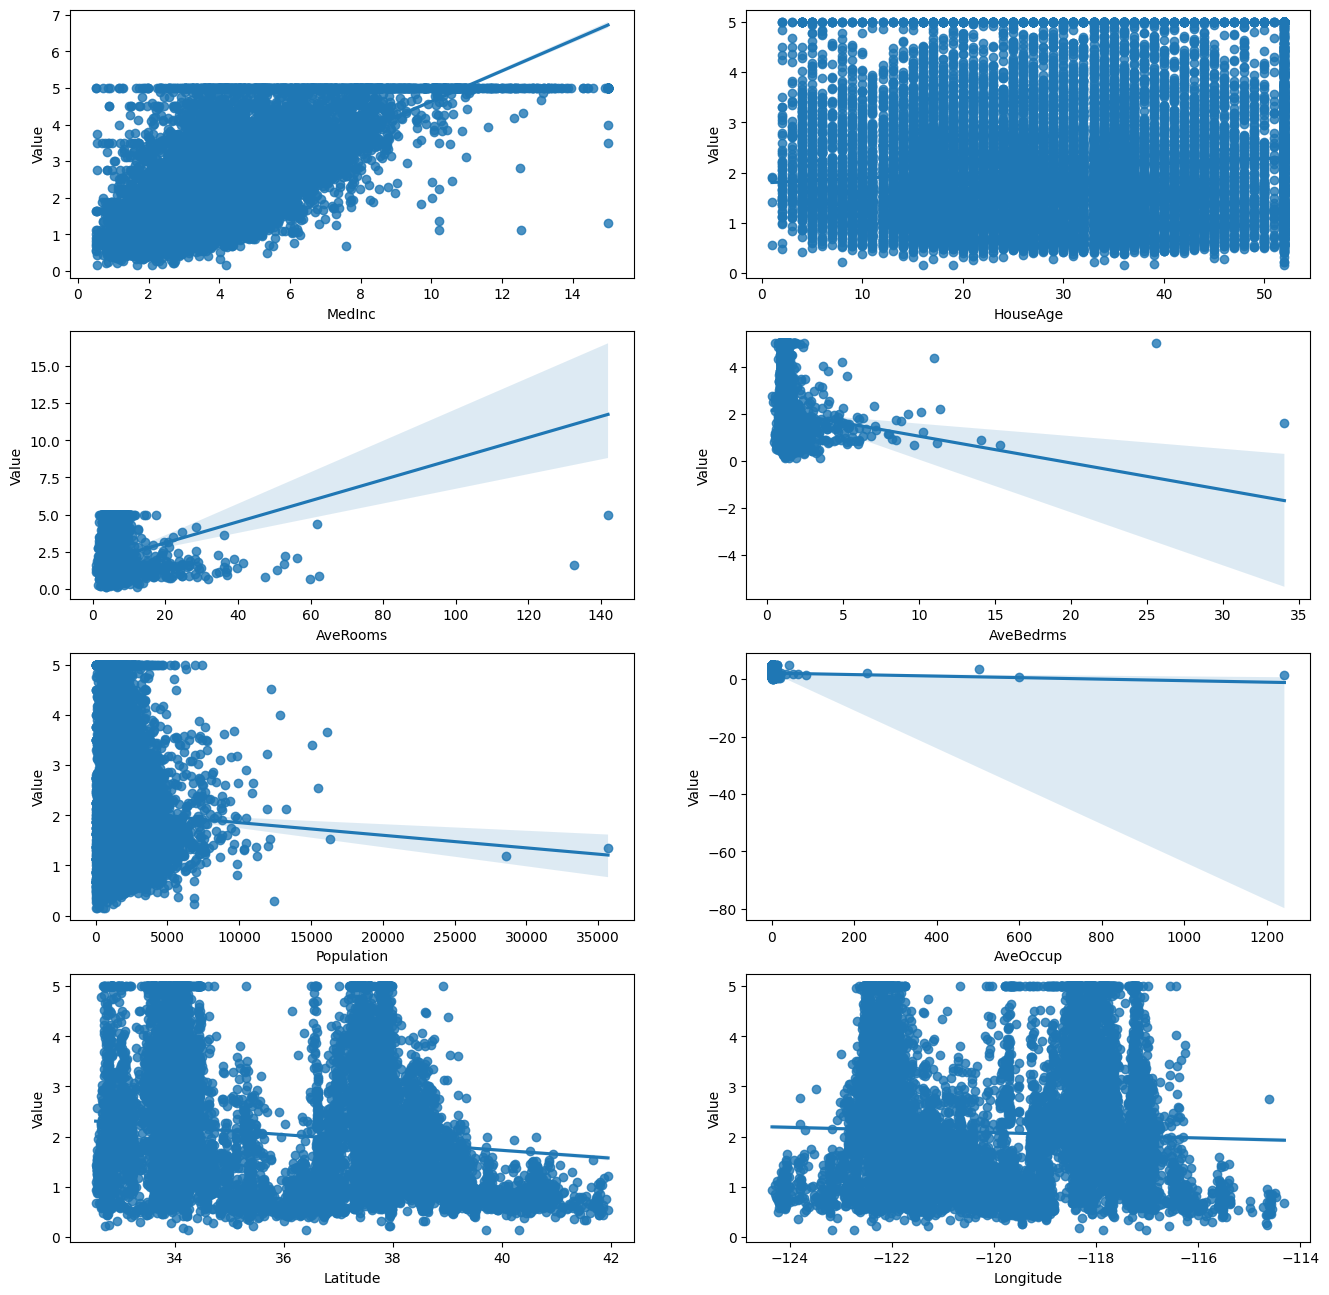

In [72]:
fig, axes = plt.subplots(figsize = (16, 16), nrows = 4, ncols = 2)

for i in range(8):
    row = int(i/2)
    col = i%2
    sns.regplot(x = df.iloc[:, i], y = df['Value'], data=df, ax = axes[row][col])

plt.show

In [92]:
# 데이터의 분할
# train , test / 독립, 종속
from sklearn.model_selection import train_test_split
x = df.drop('Value', axis=1)
y = df['Value']

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=100)

In [74]:
# Value의 평균을 train, test 확인
print("train 데이터의 Value의 평균", y_train.mean())
print("test 데이터의 Value의 평균", y_test.mean())

train 데이터의 Value의 평균 2.0715573843265505
test 데이터의 Value의 평균 2.056561308139535


In [75]:
# 데이터를 스케일링
# max abs 스케일링
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaler.fit(x_train)

MaxAbsScaler()

In [76]:
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

In [77]:
# 선형 회귀 알고리즘
from sklearn.linear_model import LinearRegression
# 객체 생성
linear = LinearRegression()

In [78]:
# fit -> 학습
linear.fit(x_train_sc, y_train)

LinearRegression()

In [79]:
pred = linear.predict(x_test_sc)

In [80]:
pred

array([2.07653781, 1.57976836, 2.08731697, ..., 1.04278469, 1.12583146,
       1.9625772 ], shape=(4128,))

In [81]:
y_test

8151     2.45300
53       1.04200
3039     1.46200
9484     1.54200
9307     3.24200
          ...   
16733    1.17200
5264     5.00001
12374    2.39300
19662    0.85700
11942    1.13900
Name: Value, Length: 4128, dtype: float64

In [82]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [83]:
# 학습 데이터를 예측한 결과를 저장
pred = linear.predict(x_train_sc)

mae = mean_absolute_error(y_train, pred)
mse = mean_squared_error(y_train, pred)
rmse = np.sqrt(mse)

# 결정계수 출력
r2 = r2_score(y_train, pred)

print('MAE : ', round(mae, 2))
print('MSE : ', round(mse, 2))
print('RMSE : ', round(rmse, 2))
print('R2_score : ', round(r2, 2))

MAE :  0.53
MSE :  0.53
RMSE :  0.73
R2_score :  0.6


In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [90]:
# Scaler를 Standard
# x_train, x_test 스케일링
StdScaler = StandardScaler()
# 범위를 지정 x_train
x_train_std = StdScaler.fit_transform(x_train)
x_test_std = StdScaler.transform(x_test)

# 학습
linear2 = LinearRegression()
linear2.fit(x_train_std, y_train)

# MAE, MSE, RMSE, R2Score는 test_data로 출력
std_pred = linear2.predict(x_test_std)

std_mae = mean_absolute_error(y_test, std_pred)
std_mse = mean_squared_error(y_test, std_pred)
std_rmse = np.sqrt(std_mse)
std_r2 = r2_score(y_test, std_pred)

print('MAE : ', round(std_mae, 2))
print('MSE : ', round(std_mse, 2))
print('RMSE : ', round(std_rmse, 2))
print('R2_score : ', round(std_r2, 2))

MAE :  0.53
MSE :  0.51
RMSE :  0.71
R2_score :  0.62


In [94]:
# Scaler를 Robust
Ruscaler = RobustScaler()

x_train_ru = Ruscaler.fit_transform(x_train)
x_test_ru = Ruscaler.transform(x_test)

# 학습
linear3 = LinearRegression()
linear3.fit(x_train_ru, y_train)

# mae, mse, rmse, R2_score는 test_data로 출력
ru_pred = linear3.predict(x_test_ru)

ru_mae = mean_absolute_error(y_test, ru_pred)
ru_mse = mean_squared_error(y_test, ru_pred)
ru_rmse = np.sqrt(ru_mse)
ru_r2 = r2_score(y_test, ru_pred)

print('MAE : ', round(ru_mae, 2))
print('MSE : ', round(ru_mse, 2))
print('RMSE : ', round(ru_rmse, 2))
print('R2_score : ', round(ru_r2, 2))

MAE :  0.53
MSE :  0.51
RMSE :  0.71
R2_score :  0.62
